<a href="https://colab.research.google.com/github/aSafarpoor/DIP/blob/main/DIP_HW5_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIP**

**HW5**

**Q4**

---

*Ali Safarpoor Dehkordi*

*99210301*

---

---

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.signal as sig
import cv2
import cv2 as cv

In [2]:
from matplotlib.pyplot import imshow
%matplotlib inline

## read file

In [ ]:
!wget https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip

--2022-07-10 22:04:02--  https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l5lg0yrs1k7ydmb/HW5.zip [following]
--2022-07-10 22:04:02--  https://www.dropbox.com/s/raw/l5lg0yrs1k7ydmb/HW5.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84ae3862e4708b1016aa071bae.dl.dropboxusercontent.com/cd/0/inline/Bo1nMFF3WfOq-sAXkRvZFfFbY8SXm23okyhmE59sCobt7FtoYpEp-N_G-TECaf7OzliW-7GKxAyCbZYW6_8ip9G3UxtcSsKMgzaHmc2ww4UycgzPX2Pjt0htStZBsPLZWVnz_USjdzFPF0TZl2pDv1lwb15lPQhPRYZIUW-RZoT5Ew/file# [following]
--2022-07-10 22:04:03--  https://uc84ae3862e4708b1016aa071bae.dl.dropboxusercontent.com/cd/0/inline/Bo1nMFF3WfOq-sAXkRvZFfFbY8SXm23okyhmE59sCobt7FtoYpEp-N_G-TECaf7OzliW-7GKxAyCbZYW6_8

In [ ]:
import zipfile
zip = zipfile.ZipFile('HW5.zip')
zip.extractall()

In [ ]:
%cd HW5
!ls

/content/HW5
blood_cell.jpg	coins.jpg  images  old_video.mp4


#function

<p dir="rtl">
در این مسئله متاسفانه به مشکل رم بر میخوردم و از طرفی اغلب توابع نتایج مطلوب را نداشت و سعی شد تست های مختلفی انجام شود تا بهترین ها انتخاب گردند.
</p>

<p dir="rtl">
در هر حال مراحل زیر انجام گردیده است:.
</p>

1.   حذف نویزهایی که به صورت یک خط عمودی هستند.
2.    حذف نویزهایی که به صورت یک جرم با شکل نامعین هستند به کمک تشخیص کانتورهای آن
3. بهبود روشنایی و کانتراست تصویر به کمک تابع گسسته ساز هیستوگرام که البته بهبود یافته آن می‌باشد.
4. حذف ویبره‌های تصویر با کمک تابع از پیش آماده
<p dir="rtl">

در این بخش به علت مشکل رم . ریست شدن مجبور شدم در مراحل مختلف ویدیو ها رو ذخیره کنم تا در نهایت به خروجی برسم.  در هر حال چالش مواجهه با چنین مشکلی در صورت اجرای مجدد دور از ذهن نیست. گرچه هیچ یک از محاسبات و دخیره سازی ها به نظر آنقدر سنگین نبوده است.
</p>



reading videos

In [3]:
def read_video(name="old_video.mp4"):
    vidcap = cv2.VideoCapture(name)
    success,image = vidcap.read()
    count = 0
    originals = []
    while success:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        originals.append(gray)
        success,image = vidcap.read()
    
    return originals

write video


<p dir="rtl">
در اینجا تابع مدنظر گزینه سریع تر بین موارد مختلف بود که ورودی سه کاناله لازم داشت.
</p>

In [4]:
import os
from moviepy.video.io import ImageSequenceClip
from google.colab import files

def write_video(ims,name):
    fps=25
    out2 = np.array(ims)
    out3 = [np.array([np.array(i).transpose(),np.array(i).transpose(),np.array(i).transpose()]).transpose() for i in out2]
    clip = ImageSequenceClip.ImageSequenceClip(out3, fps=fps)
    clip.write_videofile(name)

def downloader(name):
    files.download(name) 

# remove line noises:

In [ ]:
original = read_video()
imgs = np.copy(original)

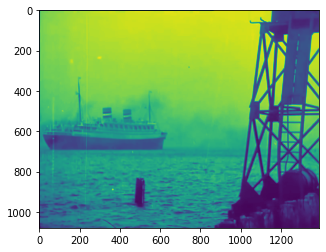

In [ ]:
imshow(imgs[138][:,260:-270])

در این بخش به کمک کنی تلاش شده مرزها پیدا شوند و سپس به کمک هاف تلاش شده تا خطوط پیدا شوند و براساس اطلاعات موجود در سایت گیکس فور گیکس با مکحاسبه کوسینوس نقاط خطوط عمودی انتخاب گردیده و به ادغام در همسایگی حذف میگردند.

نمونه  مرزها:

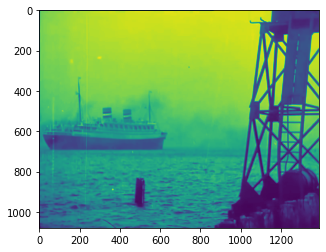

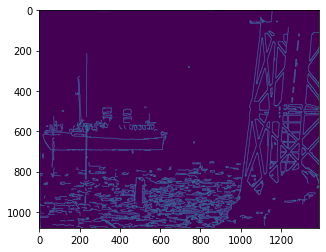

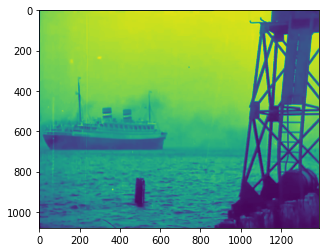

In [ ]:
def canny_line_denoiser(image):
    im = np.copy(image)
    edges = cv2.Canny(im,80,30,apertureSize = 3, L2gradient = True)
    x = np.zeros(im.shape)
    imshow(edges)
    plt.show()
    for i in range(5,-5+len(im)):
        for j in range(5,-5+len(im[0])):
            c = 0
            if edges[i][j]>0 and edges[i-1][j]>0 and edges[i+1][j]>0 : #and edges[i+2][j]==0 and edges[i-2][j]==0:
                x[i][j] = 255
                im[i][j-1] = min(im[i][j],im[i][j-1],im[i][j-2],im[i][j+1],im[i][j-3])
                im[i][j] = min(im[i][j+1],im[i][j-1],im[i][j],im[i][j+2],im[i][j-2])
    return im

image = np.copy(imgs[138][:,260:-270])
imshow(imgs[138][:,260:-270]);plt.show()
imshow(canny_line_denoiser(image));plt.show()

90 degree, vertical line
نمونه خطوط عمودی:

به کمک کنی و هاف

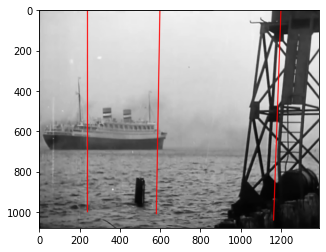

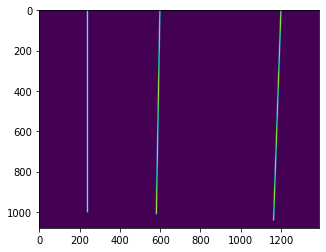

In [ ]:
import math
def vertical_line_90_degree(image,show=False):
    img = np.copy(image)
    # Apply edge detection method on the image
    edges = cv2.Canny(img,80,30,apertureSize = 3, L2gradient = True)
    lines = cv2.HoughLines(edges, 120, np.pi/180, 200)
    cdst = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    raw = cdst*0

    for r_theta in lines:
        arr = np.array(r_theta[0], dtype=np.float64)
        rho, theta = arr
        a = math.cos(theta)
        if a >  0.999:
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (255,0,0), 3, cv.LINE_AA)
            cv.line(raw, pt1, pt2, (255,255,255), 3, cv.LINE_AA)
    if show:
        imshow(cdst);plt.show()
        imshow(np.array(raw[:,:,0]));plt.show()

    return np.array(raw[:,:,0])


image = np.copy(imgs[138][:,260:-270])
edge = vertical_line_90_degree(image,show=True)

In [ ]:
def clean_line(edge,image):
    color = 255
    for i in range(len(image)):
        for j in range(len(image[0])):
            if edge[i][j]==255:
                image[i][j] = color
            else:
                color = image[i][j]
    return image

image = clean_line(edge,image)

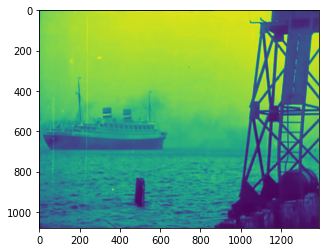

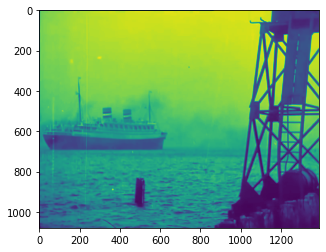

In [ ]:
imshow(image);plt.show()
image2 = np.copy(imgs[138][:,260:-270])
imshow(image2);plt.show()

In [ ]:
for i in tqdm(range(len(imgs))):
    image = imgs[i]
    edge = vertical_line_90_degree(image,show=False)
    image = clean_line(edge,image)
    imgs[i]=np.copy(image)
    # imshow(image);plt.show()

100%|██████████| 600/600 [43:05<00:00,  4.31s/it]


In [ ]:
write_video(imgs,name='deline.mp4')
downloader(name='deline.mp4')

[MoviePy] >>>> Building video deline.mp4
[MoviePy] Writing video deline.mp4


100%|██████████| 600/600 [01:33<00:00,  6.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: deline.mp4 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#de mass


<p dir="rtl">
حذف جرم ها با کمک کانتورها با مساحت در بازه ای که مستعد کانتوربودن هستند.
</p>

In [26]:
imgs = read_video('deline.mp4')
imgs = np.copy(imgs)
len(imgs)

600

In [27]:
def remove_mass(img):
    im = np.copy(img)

    ret, thresh = cv2.threshold(im, im.max()-30 , 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    lst = []
    for c in contours:
        area = cv.contourArea(c)
        if area > 10 and area<10000:
            lst.append(c)
    remain_index = []
    ind = 0
    for c in lst:   
        flag = True
        z = 0 
        for x in c:
            j,i=x[0]
            if im[i][j]>170:
                if im[i-1][j] < 70 or im[i][j-1] < 70 :
                    z+=1
                if z>3:
                    flag = False
                    break
            else:
                flag = False
                break
        if flag:
            remain_index.append(ind)
        ind+=1

    newlst = []
    for i in remain_index:
        newlst.append(lst[i])
    raw = np.zeros(im.shape)
    raw = cv.drawContours(raw, newlst, -1, (255), -1)
    raw[0:400,1250:1750]=0
    color =255
    for i in range(5,-5+len(im)):
        for j in range(5,-5+len(im[0])):
            if raw[i][j]>0:
                im[i][j] = color-10
            else:
                color = int(im[i][j])
    im = np.array(im, dtype=int)
    return im

In [29]:
for i in tqdm(range(len(imgs))):
    imgs[i] = remove_mass(imgs[i])

100%|██████████| 600/600 [16:15<00:00,  1.63s/it]


In [31]:
imgs = np.array(imgs, dtype=np.uint8)

In [ ]:
# write_video(imgs,name='demass2.mp4')
# downloader(name='demass2.mp4')

# improve brightness


<p dir="rtl">
برای بهبود این بخش یک مورد مورد توجه قرار گرفت. در حالت عادی معمولا اختلاف ها اگر به صورت ضریب باشد در قسمت های روشن تر بهتر دیده می‌شود. اینجا واروون کردن نقاط روشن و تیره فرصت ایجاد تضاد در نقاط تاریک تر را بهبود دادیم و در نهایت دوباره معکوس نموده تا خروجی مدنظر حاصل گردد.
</p>

In [8]:
imgs = read_video('demass.mp4')
type(imgs),len(imgs)

(list, 600)

In [9]:
# imgs = np.array(imgs, dtype=np.float32)

In [10]:
def histogram_change(image):
    img = np.copy(image[:,260:-270])

    shape_ = img.shape
    img = img.reshape(-1)


    img = 255-img
    ma = np.max(img)
    mi = np.min(img)

    img = 255*((img-mi)/(ma-mi))
    img = 255-img

    img = img.reshape(shape_)
    # img = np.array(img, dtype=int)
    return np.array(img, dtype=np.uint8)

# ims = []
for i in tqdm(range(len(imgs))):
    imgs[i] = histogram_change(imgs[i])



100%|██████████| 600/600 [00:05<00:00, 100.09it/s]


In [11]:
# imgs = np.array(imgs, dtype=int)

In [12]:
# import pickle
# with open('temp.p','wb') as f: pickle.dump(imgs, f)

In [13]:
imgs = np.array(imgs, dtype=np.uint8)

write_video(imgs,name='histomize2.mp4')
downloader(name='histomize2.mp4')

[MoviePy] >>>> Building video histomize2.mp4
[MoviePy] Writing video histomize2.mp4


100%|██████████| 600/600 [01:13<00:00,  8.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: histomize2.mp4 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# devibration


<p dir="rtl">
بر اساس لینک زیر عمل شد تا ویبره تصویر حذف شود.
در حرکتی دیگر سعی شد با انتخاب همسایگی ها با بیشترین شباهت نویز گیری شود که خروجی مطلوب نداشت و حذف گردید.
</p>

based on https://github.com/AdamSpannbauer/python_video_stab

In [14]:
!pip install VidStab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from vidstab import VidStab

stabilizer = VidStab()

# filled in borders
stabilizer.stabilize(input_path='histomize2.mp4', 
                     output_path='devibration.mp4', 
                     border_type='reflect')

In [16]:
# write_video(imgs,name='devibration.mp4')
downloader("devibration.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>